Importar las librerías necesarias

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler, RobustScaler


# Exploración de Datos

Este notebook tiene como objetivo analizar y preparar los datos antes del entrenamiento del modelo de Machine Learning. Exploraremos la distribución de las variables, identificaremos valores atípicos y aplicaremos transformaciones necesarias para mejorar el rendimiento del modelo.


### Carga de datos

In [5]:
#cargar los datos desde csv
df = pd.read_csv("../data/fraudDataset.csv")
df.head()



,a,b,c,d,e,f,g,h,j,k,l,m,n,o,p,fecha,monto,score,fraude
0,4,0.6812,50084.12,50.0,0.000000,20.0,AR,1,cat_d26ab52,0.365475,2479.0,952.0,1,NaN,Y,2020-03-20 09:28:19,57.63,100,0
1,4,0.6694,66005.49,0.0,0.000000,2.0,AR,1,cat_ea962fb,0.612728,2603.0,105.0,1,Y,Y,2020-03-09 13:58:28,40.19,25,0
2,4,0.4718,7059.05,4.0,0.463488,92.0,BR,25,cat_4c2544e,0.651835,2153.0,249.0,1,Y,Y,2020-04-08 12:25:55,5.77,23,0
3,4,0.7260,10043.10,24.0,0.046845,43.0,BR,43,cat_1b59ee3,0.692728,4845.0,141.0,1,N,Y,2020-03-14 11:46:13,40.89,23,0
4,4,0.7758,16584.42,2.0,0.154616,54.0,BR,0,cat_9bacaa5,0.201354,2856.0,18.0,1,Y,N,2020-03-23 14:17:13,18.98,71,0


### Exploración inicial.

In [6]:
# Dimensiones del dataset
print(f"El dataset tiene {df.shape[0]} filas y {df.shape[1]} columnas.")

# Tipos de datos
print("\nTipos de datos:")
print(df.dtypes)

# Valores nulos
print("\nValores nulos:")
print(df.isnull().sum())

El dataset tiene 150000 filas y 19 columnas.

Tipos de datos:
a           int64
b         float64
c         float64
d         float64
e         float64
f         float64
g          object
h           int64
j          object
k         float64
l         float64
m         float64
n           int64
o          object
p          object
fecha      object
monto     float64
score       int64
fraude      int64
dtype: object

Valores nulos:
a              0
b          12984
c          12984
d            365
e              0
f             11
g            194
h              0
j              0
k              0
l             11
m            365
n              0
o         108857
p              0
fecha          0
monto          0
score          0
fraude         0
dtype: int64


In [7]:
# Información general del dataset
print(df.info())

# Estadísticas descriptivas
print(df.describe())

# Verificar el balance de la variable objetivo (fraude o no fraude)
print(df['fraude'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 19 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   a       150000 non-null  int64  
 1   b       137016 non-null  float64
 2   c       137016 non-null  float64
 3   d       149635 non-null  float64
 4   e       150000 non-null  float64
 5   f       149989 non-null  float64
 6   g       149806 non-null  object 
 7   h       150000 non-null  int64  
 8   j       150000 non-null  object 
 9   k       150000 non-null  float64
 10  l       149989 non-null  float64
 11  m       149635 non-null  float64
 12  n       150000 non-null  int64  
 13  o       41143 non-null   object 
 14  p       150000 non-null  object 
 15  fecha   150000 non-null  object 
 16  monto   150000 non-null  float64
 17  score   150000 non-null  int64  
 18  fraude  150000 non-null  int64  
dtypes: float64(9), int64(5), object(5)
memory usage: 21.7+ MB
None
                   a   

In [8]:

monto_col = 'monto'
# Estadísticas generales
stats = df[monto_col].describe()

# Cálculo de valores adicionales
stats["varianza"] = np.var(df[monto_col], ddof=1)  # Varianza muestral
stats["skewness"] = df[monto_col].skew()  # Asimetría
stats["kurtosis"] = df[monto_col].kurtosis()  # Curtosis

# Mostrar resultados
print(stats)


count       150000.000000
mean            43.523134
std             91.557888
min              0.020000
25%              9.380000
50%             20.610000
75%             40.692500
max           3696.350000
varianza      8382.846771
skewness         9.733923
kurtosis       180.548669
Name: monto, dtype: float64


In [9]:
# Contar cuántas transacciones son fraude (1) y cuántas no (0)
fraud_counts = df['fraude'].value_counts()
fraud_percentages = df['fraude'].value_counts(normalize=True) * 100

# Mostrar los resultados
print(fraud_counts)
print(fraud_percentages)


fraude
0    142500
1      7500
Name: count, dtype: int64
fraude
0    95.0
1     5.0
Name: proportion, dtype: float64


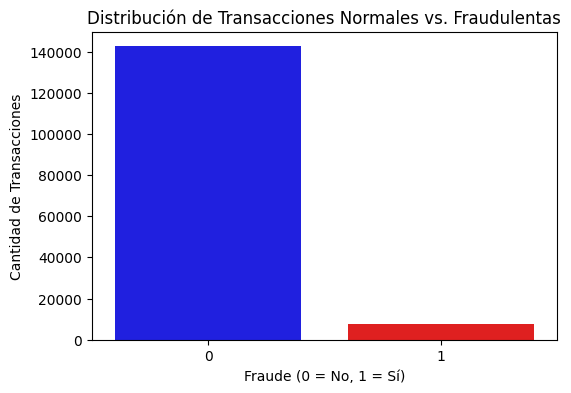

In [10]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x="fraude", hue="fraude", palette=["blue", "red"], legend=False)
plt.title("Distribución de Transacciones Normales vs. Fraudulentas")
plt.xlabel("Fraude (0 = No, 1 = Sí)")
plt.ylabel("Cantidad de Transacciones")
plt.show()


## Conclusiones:
#### Valores nulos:
Las columnas b, c, d, f, g, l, m, y o tienen valores nulos.
La columna o tiene una gran cantidad de valores nulos (solo 41,143 valores no nulos).
##### Variables numéricas:
Las columnas a, e, h, k, n, monto, score, y fraude no tienen valores nulos.
Las columnas b, c, d, f, l, y m tienen valores nulos.
##### Variables categóricas:
Las columnas g, j, o, y p son de tipo object (categóricas).

La columna fecha es de tipo object, podría ser convertida a tipo datetime.

##### Variable objetivo (fraude):
Está desbalanceada: solo el 5% de las transacciones son fraudulentas.

### Analisis univariado y bivariado

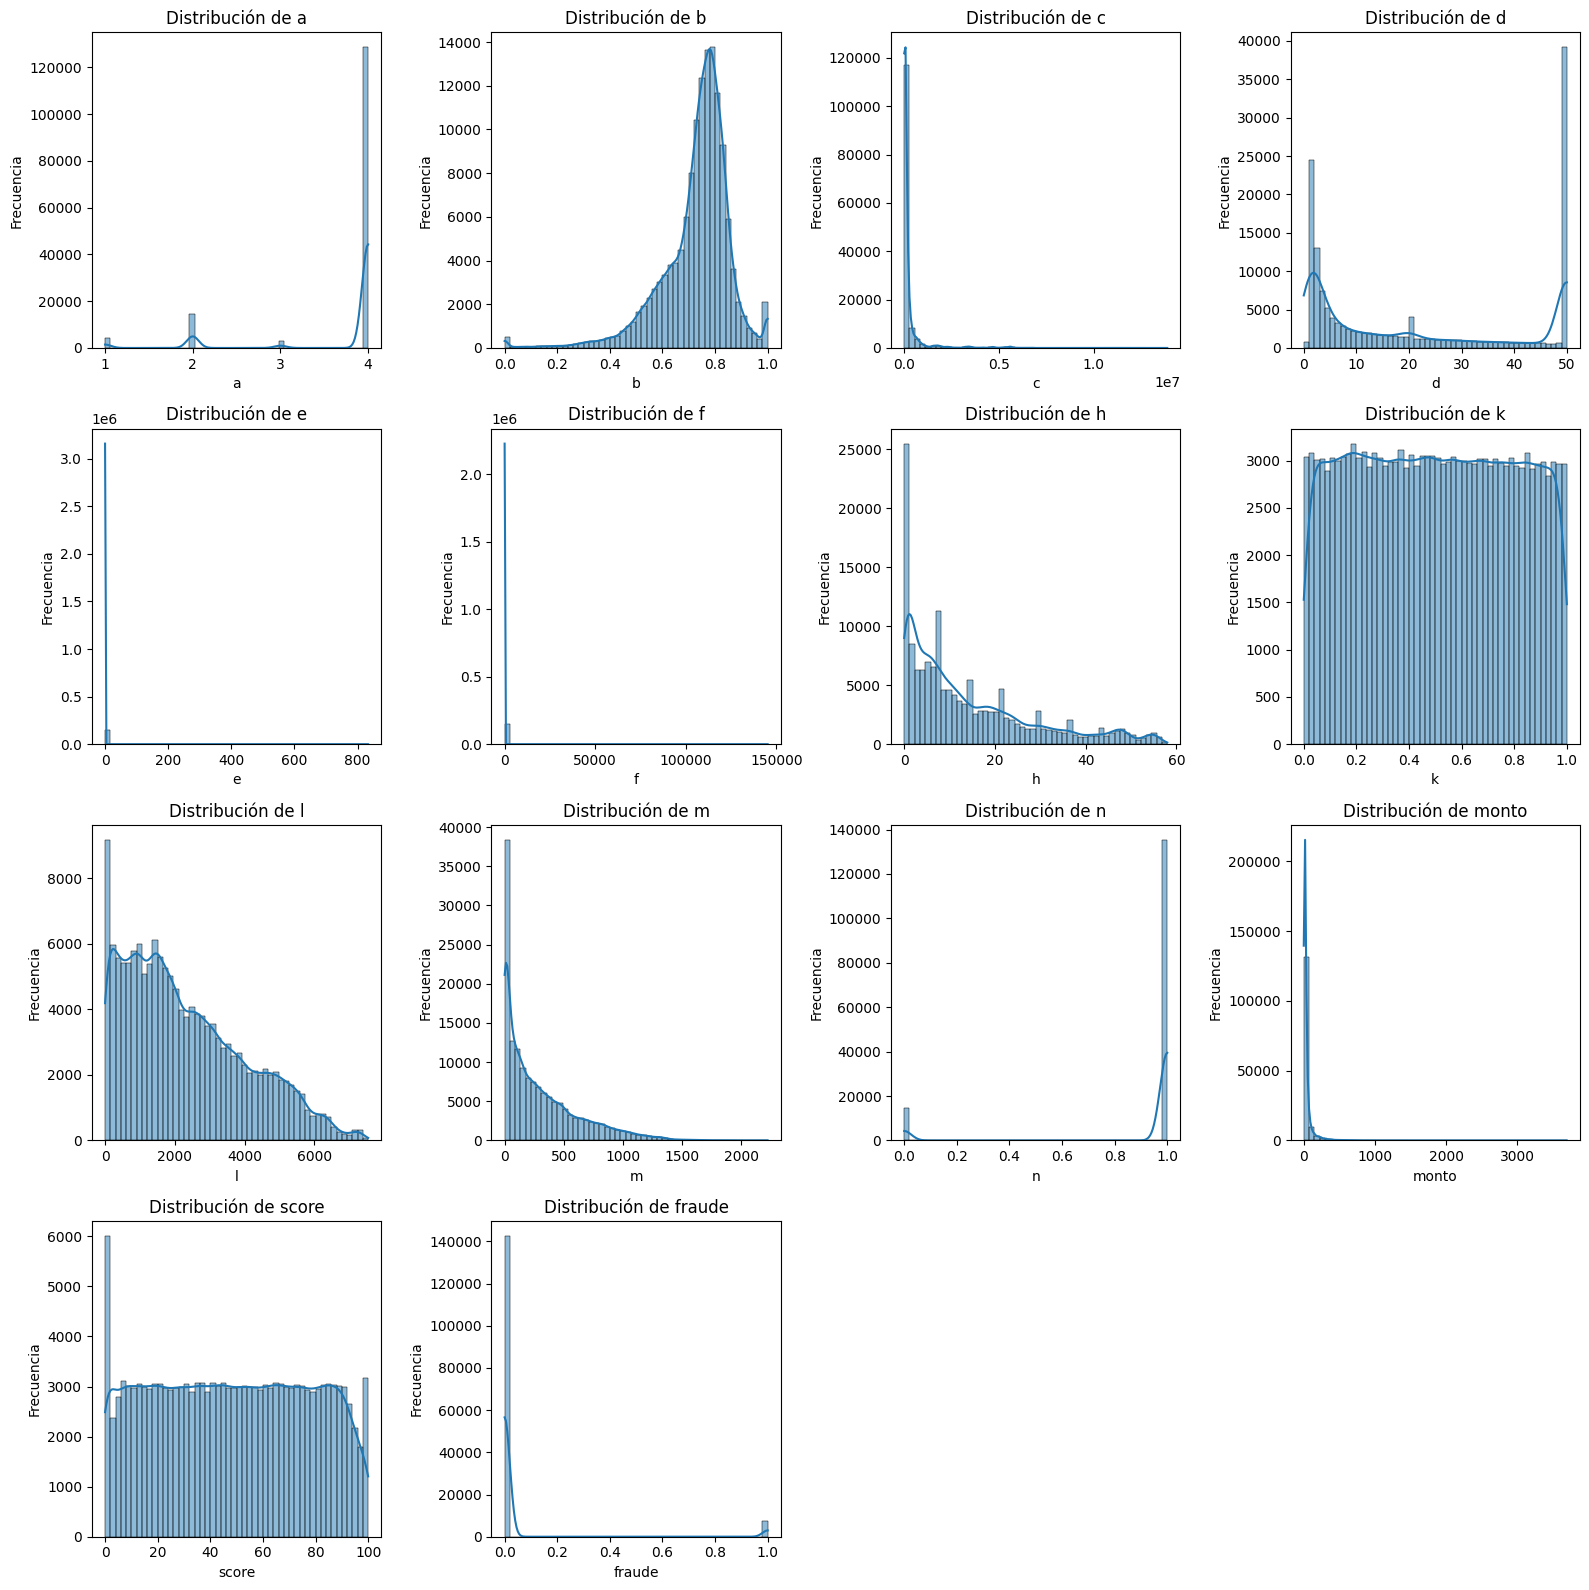

In [11]:
# Seleccionar solo las columnas numéricas
numeric_cols = df.select_dtypes(include=np.number).columns

# Definir tamaño de la cuadrícula
num_cols = len(numeric_cols)
num_filas = (num_cols // 4) + (1 if num_cols % 4 != 0 else 0)  # Calcular filas necesarias

# Crear subplots
fig, axes = plt.subplots(num_filas, 4, figsize=(16, 4 * num_filas))  # Ajusta el tamaño

# Aplanar el array de ejes si hay varias filas
axes = axes.flatten()

# Graficar histogramas
for i, col in enumerate(numeric_cols):
    sns.histplot(df[col], bins=50, kde=True, ax=axes[i])
    axes[i].set_title(f"Distribución de {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Frecuencia")

# Eliminar ejes vacíos si hay menos de 4 columnas en la última fila
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()  # Ajusta el espacio entre gráficos
plt.show()


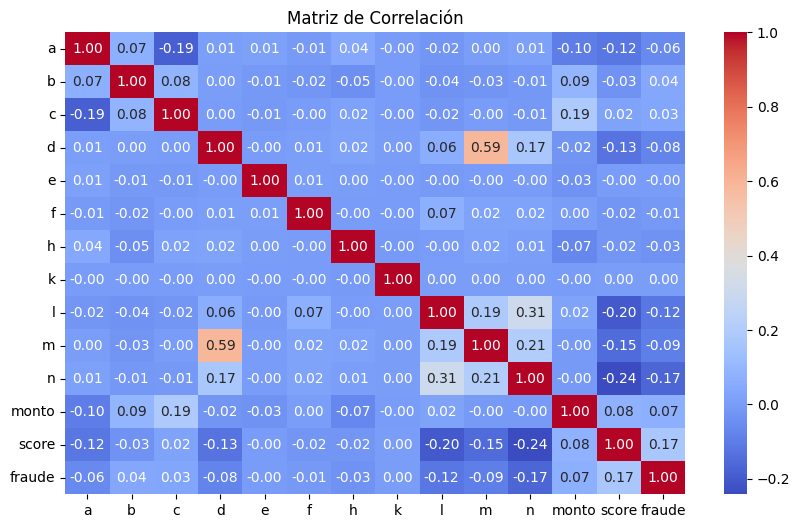

In [12]:
# Filtrar solo columnas numéricas
df_numeric = df.select_dtypes(include=['number'])

# Crear el heatmap de correlación
plt.figure(figsize=(10, 6))
sns.heatmap(df_numeric.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlación")
plt.show()


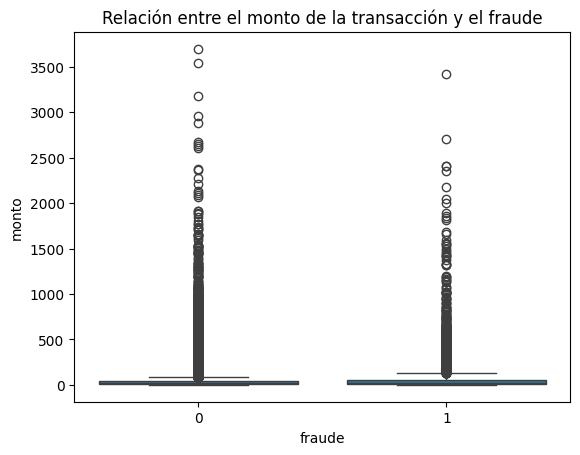

In [34]:
sns.boxplot(x='fraude', y='monto', data=df)
plt.title('Relación entre el monto de la transacción y el fraude')
plt.show()

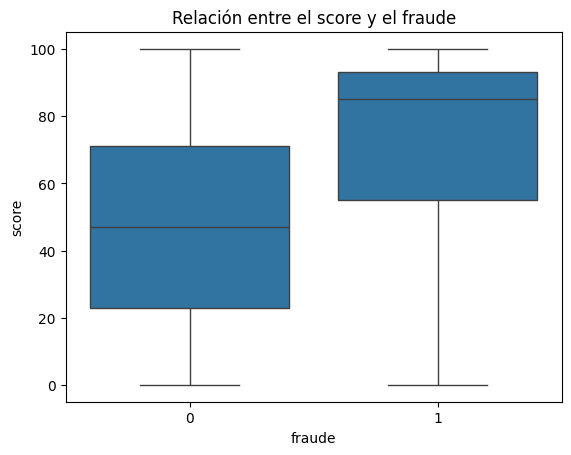

In [35]:
sns.boxplot(x='fraude', y='score', data=df)
plt.title('Relación entre el score y el fraude')
plt.show()

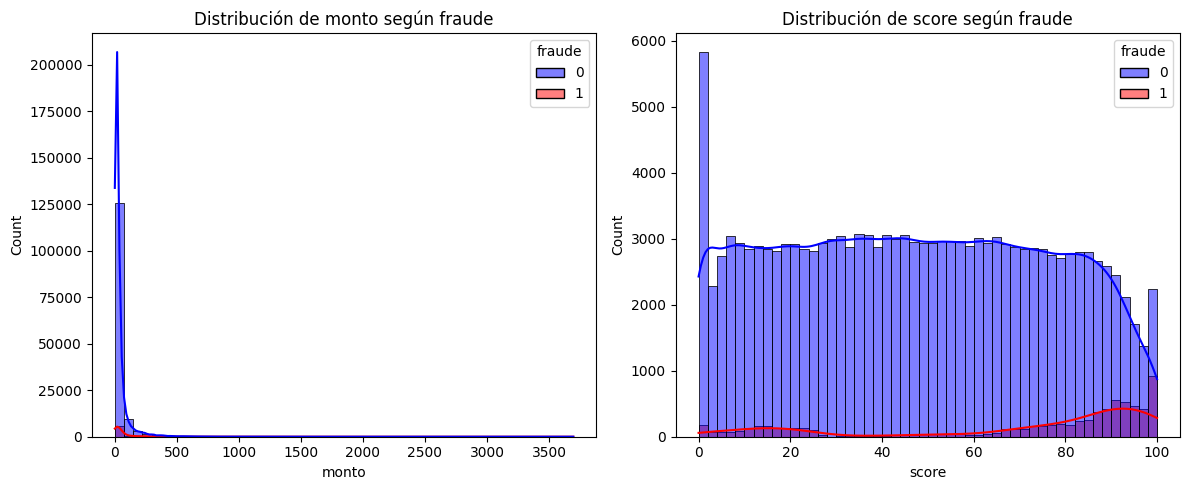

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# Lista de variables a analizar
variables = ["monto", "score"]

# Crear subplots
fig, axes = plt.subplots(1, len(variables), figsize=(12, 5))

for i, var in enumerate(variables):
    sns.histplot(data=df, x=var, hue="fraude", bins=50, kde=True, ax=axes[i], palette={0: "blue", 1: "red"})
    axes[i].set_title(f"Distribución de {var} según fraude")

plt.tight_layout()
plt.show()


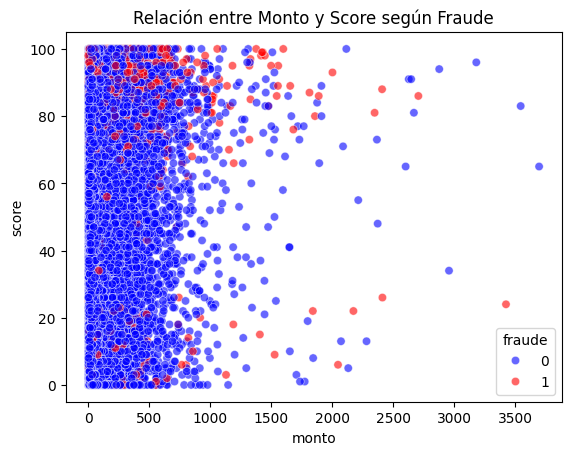

In [13]:
sns.scatterplot(data=df, x="monto", y="score", hue="fraude", alpha=0.6, palette={0: "blue", 1: "red"})
plt.title("Relación entre Monto y Score según Fraude")
plt.show()


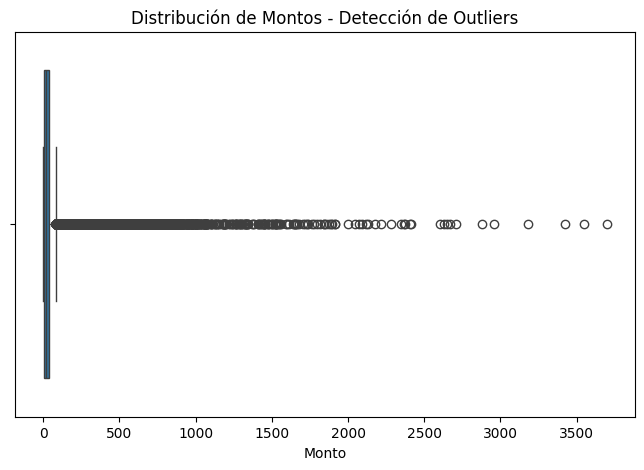

In [14]:

columna_monto = "monto"  

# Boxplot para analizar valores extremos
plt.figure(figsize=(8, 5))
sns.boxplot(x=df[columna_monto])
plt.title("Distribución de Montos - Detección de Outliers")
plt.xlabel("Monto")
plt.show()
